# Import Package

In [1]:
import pandas as pd
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv",
                        index_col = 'customerID')

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-to-month' 'O

# Data Understanding
## 1. Classification Label
- Churn - Whether the customer churned or not (Yes, No)
## 2. Services each customer has sign up
- PhoneService - whether the customer has a phone service or not (Yes,No)
- MultipleLines - whether the customer has a multiple line or not (Yes, No, No phone service)
- InternetService - type of internet service the customer has (DSL, Fiber Optic, No)
- OnlineSecurity - whether the customer has a online security or not (Yes, No)
- OnlineBackup - whether the customer has a online backup or not (Yes, No)
- DeviceProtection - whether the customer has a device protection or not (Yes, No)
- TechSupport - whether the customer has a tech support or not (Yes,No)
- StreamingTV - whether the customer has a streaming TV (Yes,No)
- StreamingMovies - whether the customer has a streaming movies (Yes,No)
## 3. Customer account information
- Tenure - how long customer has stayed in company
- Contract - type of contract customer has (Month-to-Month, One Year, Two Year)
- PaperlessBilling - whether the customer has a paperless billing (Yes,No)
- PaymentMethod - payment method use by customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - amount charged to the customer monthly
- TotalCharges - the total amount charge to the customer
## 4. Customer demographic info
- CustomerID - Unique value for each customer
- gender - type of gender customer has (Male,Female)
- SeniorCitizen - whether the customer is a senior citizen (Yes,No)
- Partner - whether the customer has a partner or not (Yes, No)
- Dependents - whether the customer has a dependents or not (Yes,No)

# Exploratory Data Analysis (EDA)

## Data Overview

In [5]:
# Check descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- SeniorCitizen must be categorical data because 25-50-70 % is 0.00 and min-max equals to 0.00 until 1.00
- Average customer stayed in company is 32 month and 75% customer has a tenure unless 55 month
- Average monthly charges are USD 64.76 and 25% customer pay more than USD 89.85

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

- TotalCharges it must be float not has data type object so i will change it

In [7]:
# Change TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

## Payment Method Check

In [8]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

I will delete the word "automatic" from PaymentMethod

In [9]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

## Missing Values

In [10]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

TotalCharges, 0.0016 % Missing values


just TotalCharge has a missing values and only a little around 0.0016%

In [11]:
# Check observation of missing values
df[df[features_na[0]].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


Because the Tenure is zero so i will delete a row of missing values

In [12]:
# Drop missing values
df.dropna(inplace=True)

## Target Values Visualization

In [13]:
plt.style.use("ggplot")

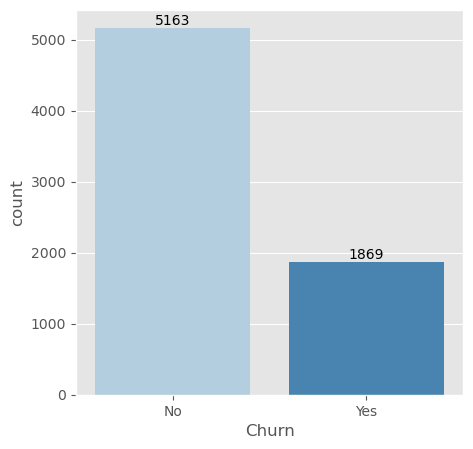

In [14]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df["Churn"],palette="Blues")
ax.bar_label(ax.containers[0])
plt.show()

Target data class is show imbalance data between churners and not-churners

## Analysis service each customer according to target (churn and no churn)

In [15]:
def plot_categorical_to_target(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

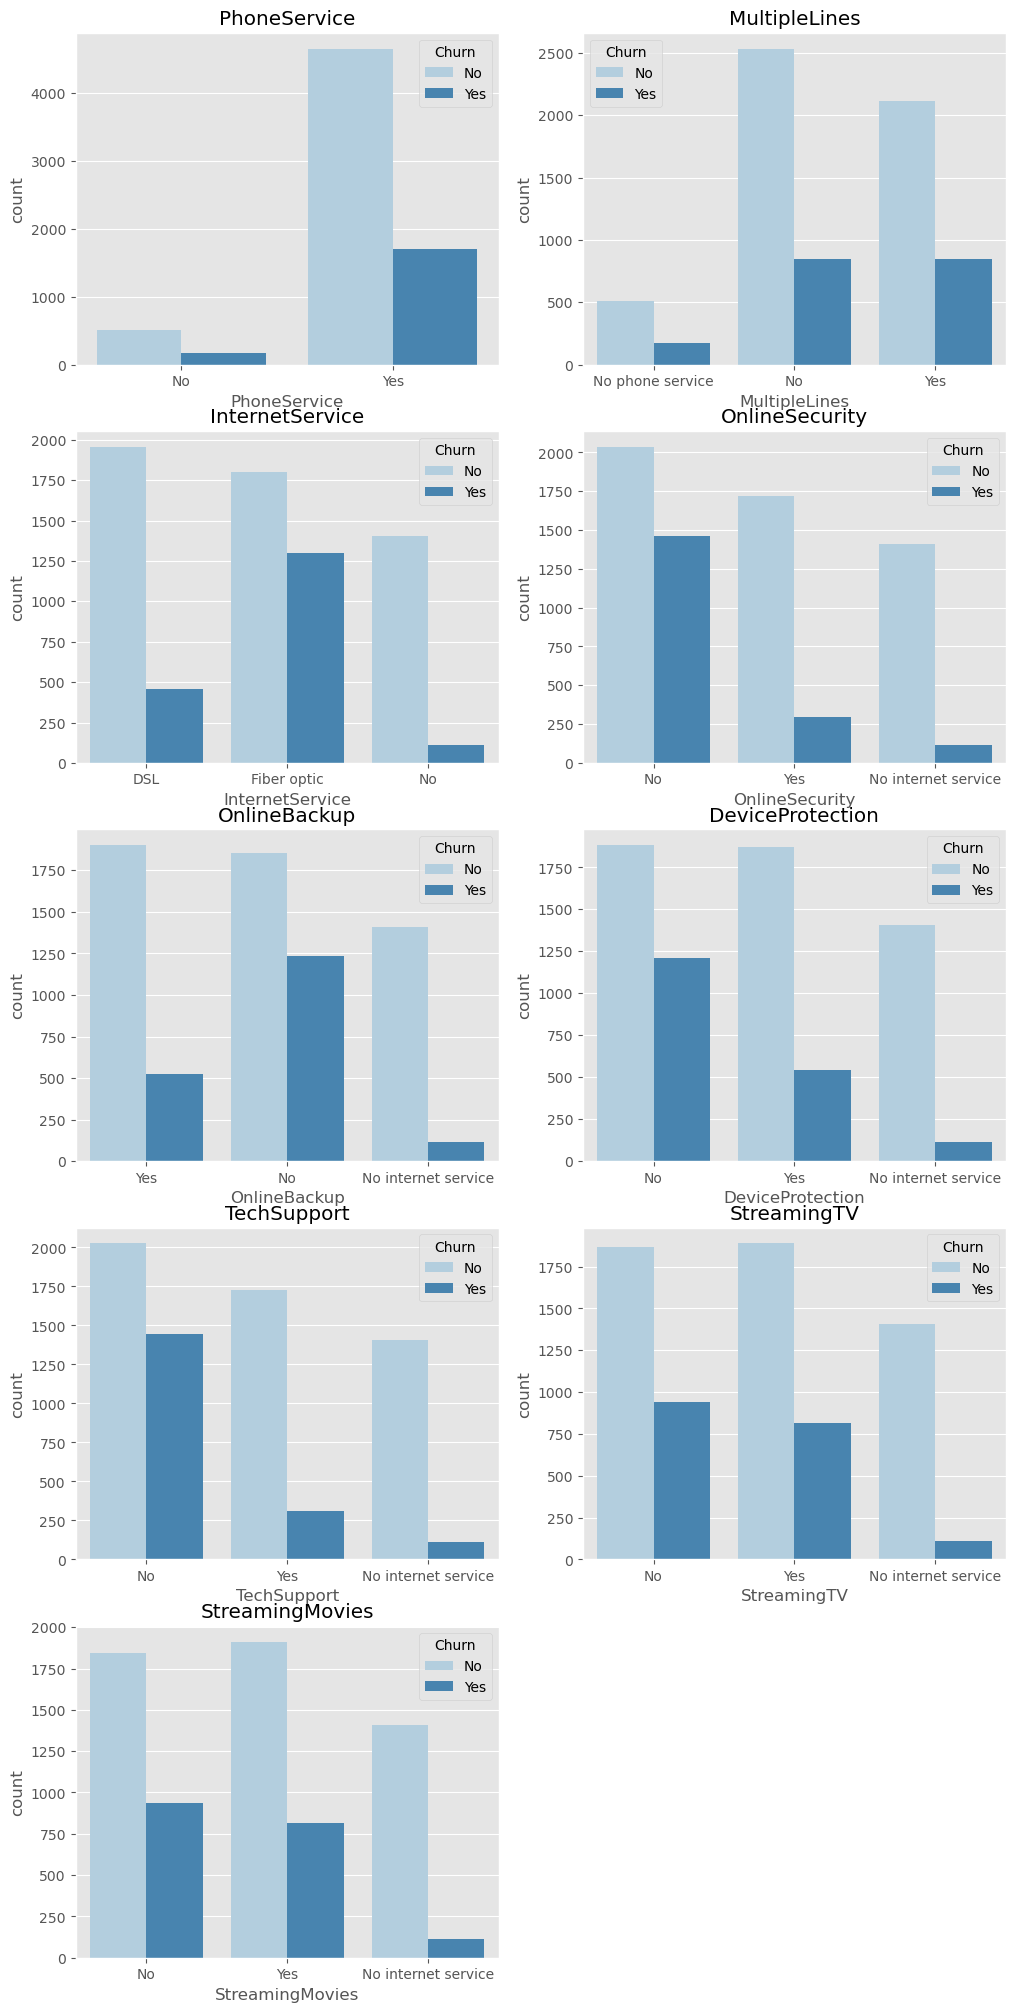

In [16]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_categorical_to_target(df,customer_services, "Churn")

- **PhoneService** - 

## Analysis Customer Account Information - Categorical Values

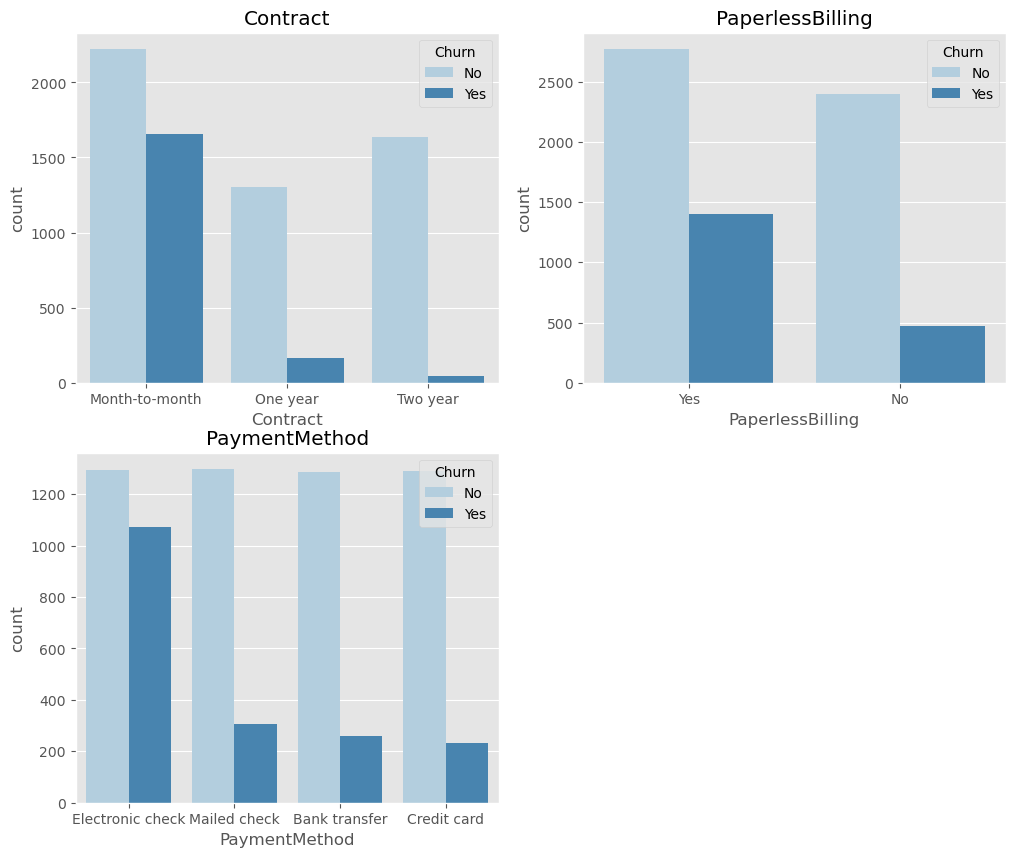

In [17]:
customer_account_cat = ["Contract","PaperlessBilling","PaymentMethod"]
plot_categorical_to_target(df,customer_account_cat,"Churn")

- **contract** - Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts
- **PaperlessBilling** - customers who receive paper bill have higher churn rate compared to customers with no receive paper bill
- **PaymentMethod** - Customers with payment method using electronic check have higher churn rates compared to mailed check, bank transfer, and credit card

## Analysis Customer Account Information - Numerical Values

In [18]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    
    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.kdeplot(df[column][df[target]=="Yes"] ,fill = True)
        ax = sns.kdeplot(df[column][df[target]=="No"], fill = True)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')
    return plt.show()

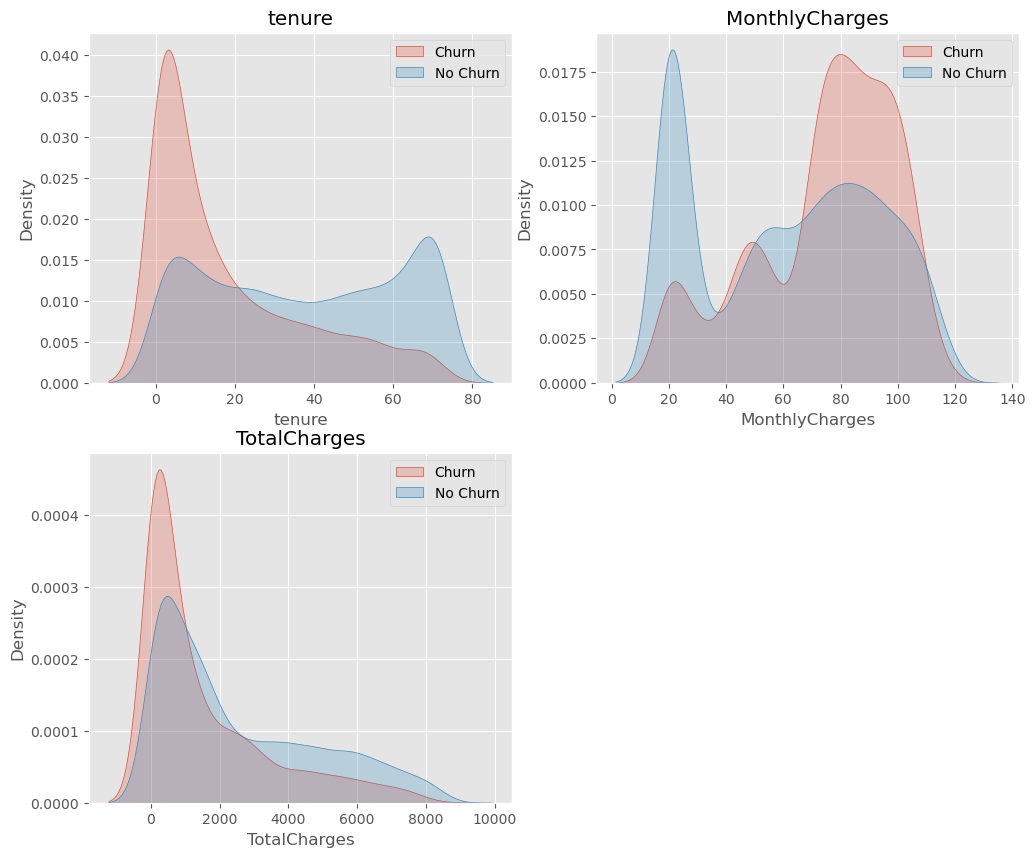

In [19]:
customer_account_num = ["tenure", "MonthlyCharges","TotalCharges"]
histogram_plots(df,customer_account_num, "Churn")

- **Tenure** - customer who has low tenure tends to churn
- **MonthlyCharges** - high churn rate when customer paid high monthly charges
- **TotalCharges** - customer with total charges high tends to leave a company 

## Analysis Customer Demographic Info

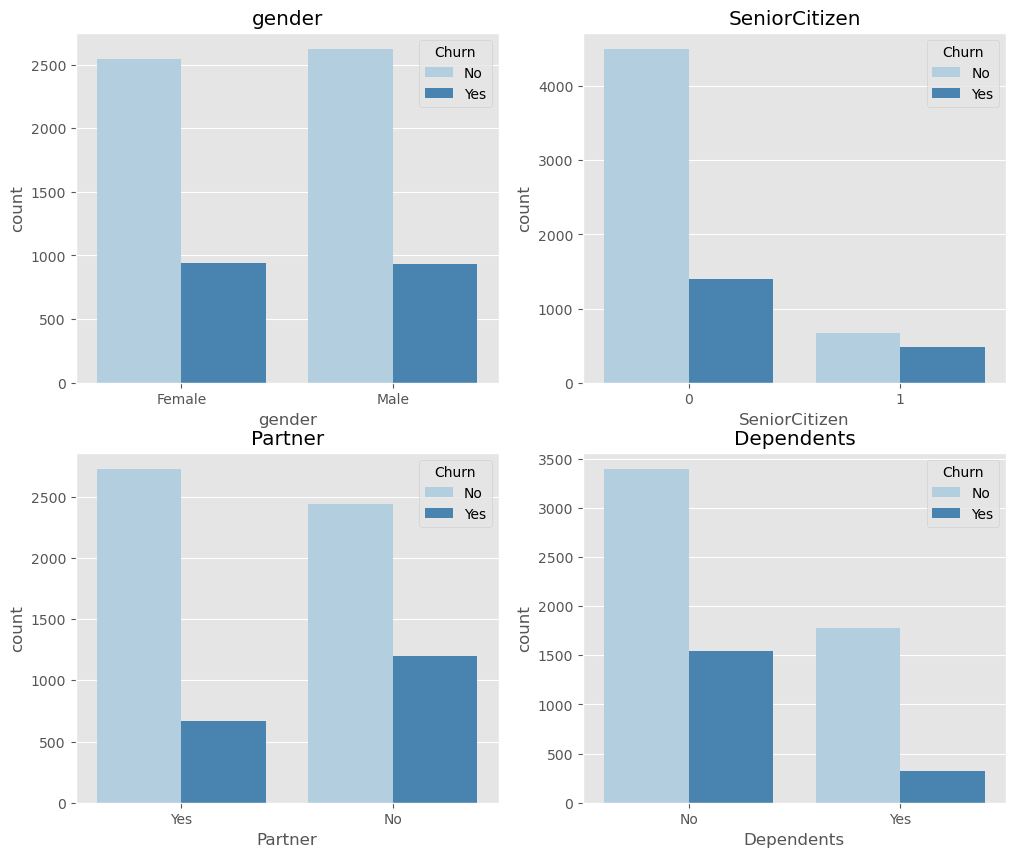

In [20]:
customer_demo_info = ["gender","SeniorCitizen","Partner","Dependents"]
plot_categorical_to_target(df, customer_demo_info,"Churn")

- **gender** - gender has no significance difference who churned and not churned
- **SeniorCitizen** - Young customers have higher churn rates compared with senior customer
- **Partner** - Customer who haven't partner more than chunr compared with have partner
- **Dependents** - Customer with no have dependents more highly churn rates compared with yes dependents

## Check Outliers Using Boxplot

In [21]:
def outlier_check_boxplot(df,numerical_values):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)
    
    fig = plt.figure(figsize=(12,5*number_of_rows))
    for index, column in enumerate(numerical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.boxplot(x = column, data = df, palette = "Blues")
        ax.set_title(column)
    return plt.show()

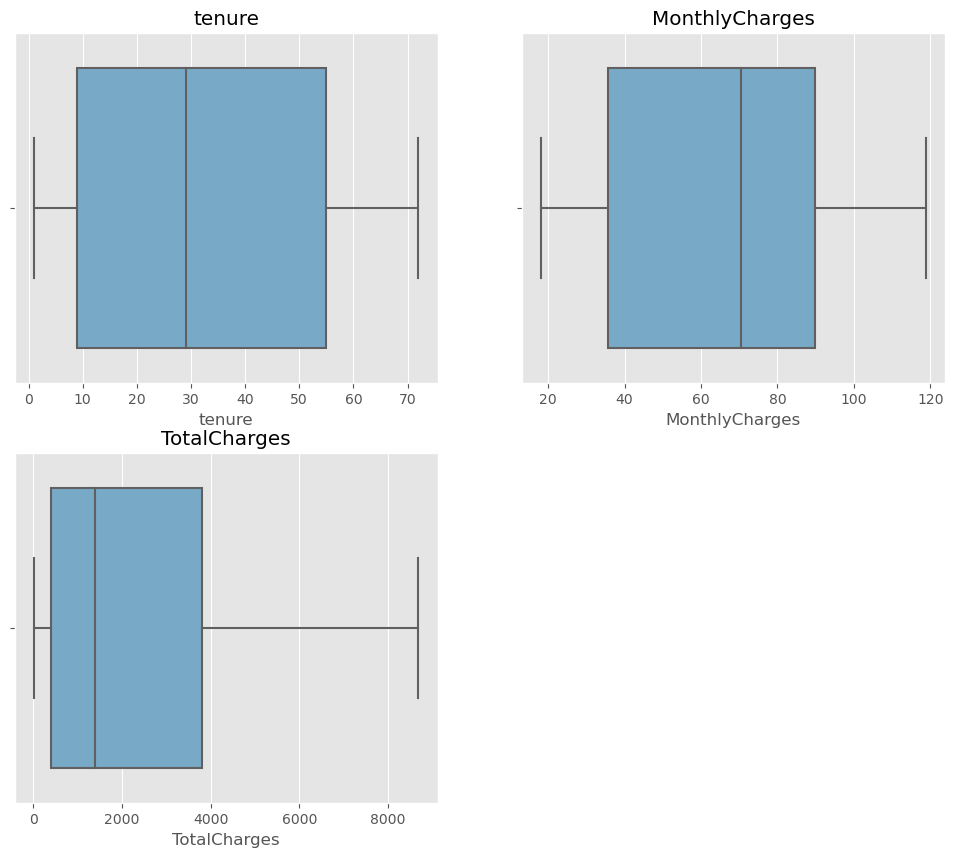

In [22]:
numerical_values = ["tenure","MonthlyCharges","TotalCharges"]
outlier_check_boxplot(df,numerical_values)

#### 

# Feature Engineering

## Label Encoding

for feature have 2 values

In [23]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

## One Hot Encoding

In [24]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

# Feature Rescaling : Min-Max Scaling

In [25]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

## Correlation Analysis

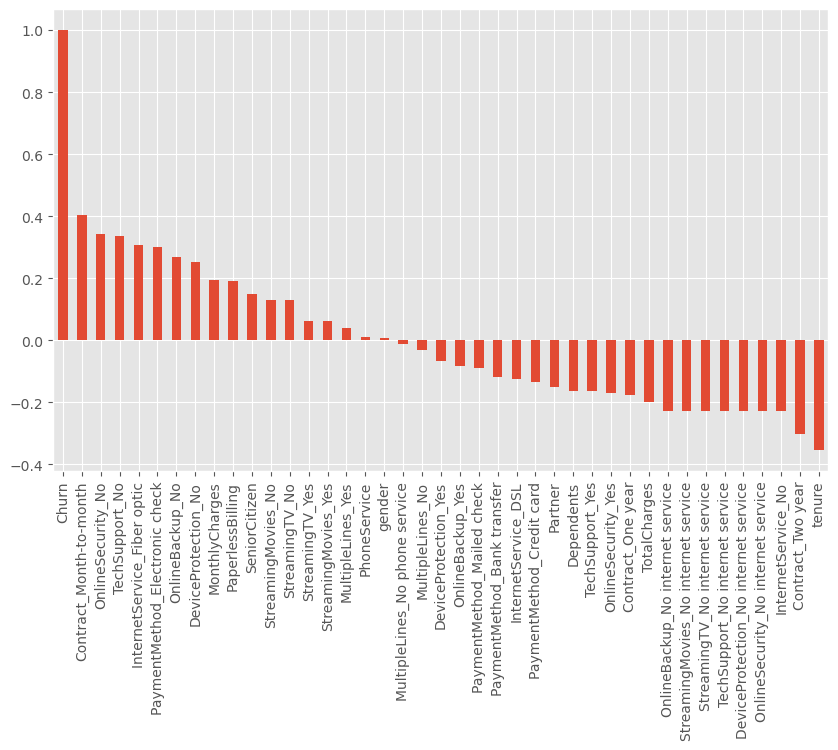

In [26]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

# Train Test Split

In [27]:
X = df.drop(columns = "Churn")
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 40), (1407, 40), (5625,), (1407,))

# Model Selection And Evaluation Model

## Make Functions for Model Evaluation Metrics


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [29]:
# For logistic Regression
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [30]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, y_pred, classifier, classifier_name):
    cm = confusion_matrix(y_pred,y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot()
    plt.title(f"Confusion Matrix - {classifier_name}")
    plt.show()
    
    print(f"Accuracy Score Test = {accuracy_score(y_pred,y_test)}")
    print(f"Accuracy Score Train = {classifier.score(X_train,y_train)}")
    return print("\n")

In [31]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities,classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1],"k--")
    plt.plot(fpr,tpr,label=f"{classifier_name}")
    plt.title(f"{classifier_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    return print(f"AUC Score (ROC):{roc_auc_score(y_test,y_pred_prob)}")

In [32]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall,precision, label=f"{classifier_name}")
    plt.title(f"{classifier_name}-ROC Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    f1_score_result, auc_score = f1_score(y_test,y_pred), auc(recall,precision)
    return print(f"f1 Score : {f1_score_result} \n AUC Score (PR) : {auc_score}")

## K-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

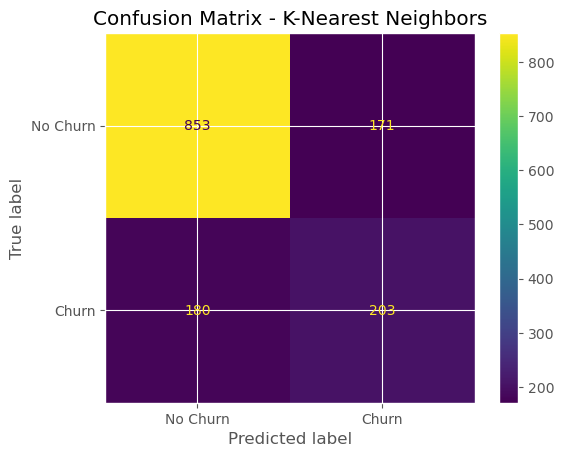

Accuracy Score Test = 0.7505330490405118
Accuracy Score Train = 0.8359111111111112




In [34]:
confusion_matrix_plot(X_train,y_train,X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")

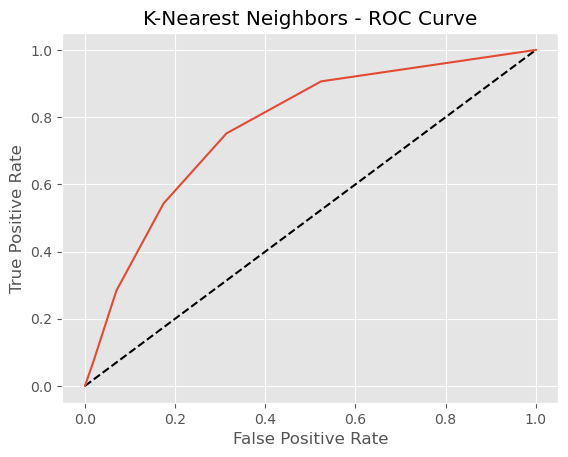

AUC Score (ROC):0.7712493076082848


In [35]:
roc_curve_auc_score(X_test,y_test,y_pred_knn_proba, "K-Nearest Neighbors")

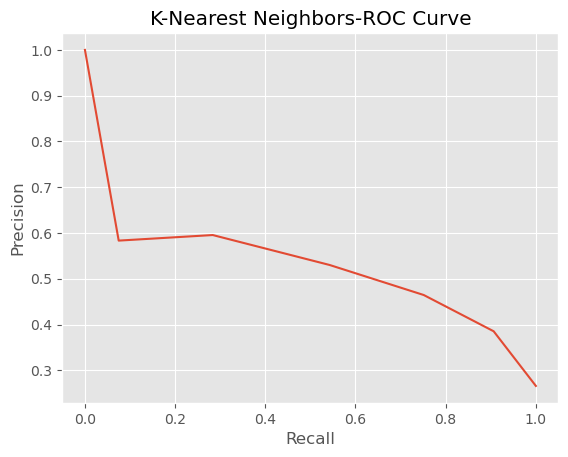

f1 Score : 0.5363276089828268 
 AUC Score (PR) : 0.5282058111891212


In [36]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_knn_proba,"K-Nearest Neighbors")

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

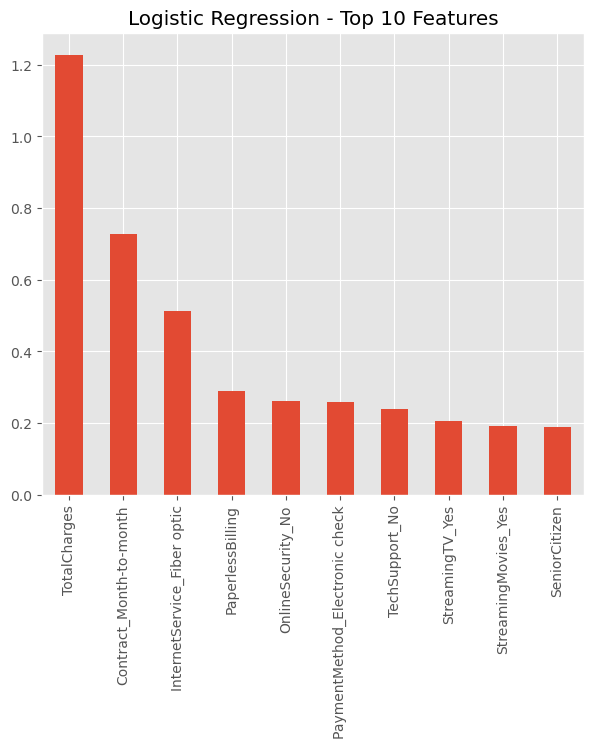

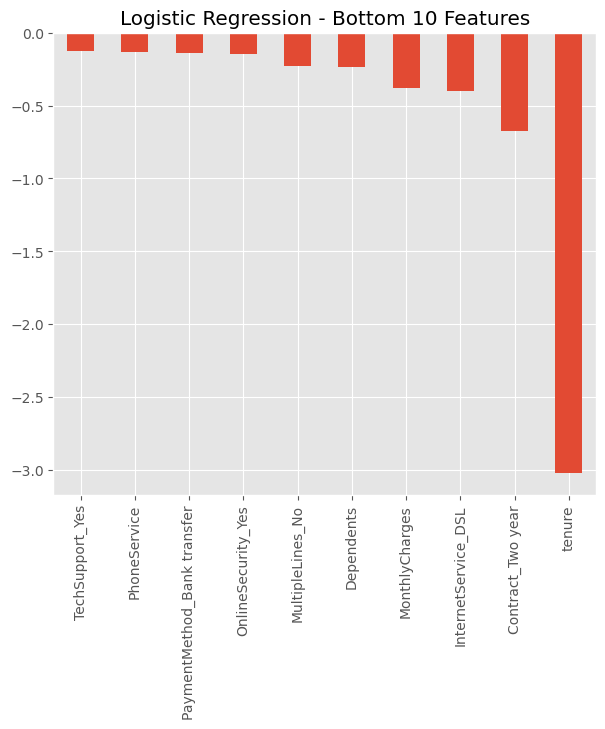

In [38]:
feature_weights(X_train,logreg,"Logistic Regression")

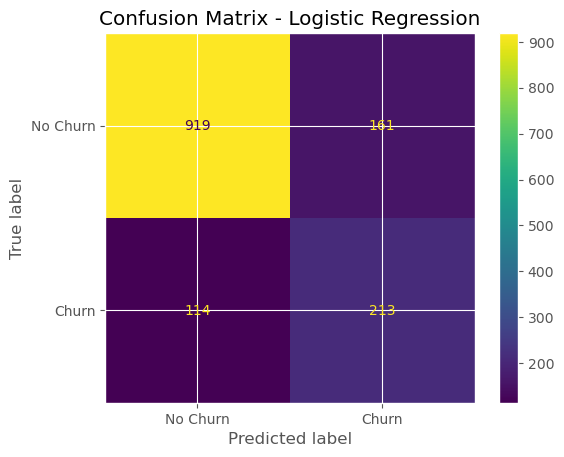

Accuracy Score Test = 0.8045486851457001
Accuracy Score Train = 0.8048




In [39]:
confusion_matrix_plot(X_train,y_train,X_test,y_test, y_pred_logreg,logreg,"Logistic Regression")

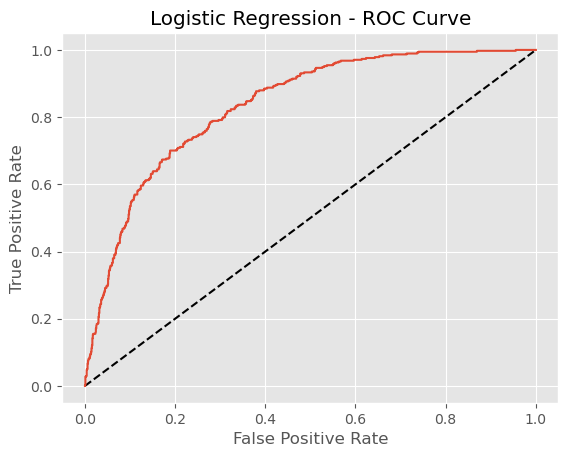

AUC Score (ROC):0.834748745929772


In [40]:
roc_curve_auc_score(X_test,y_test,y_pred_logreg_proba, "Logistic Regression")

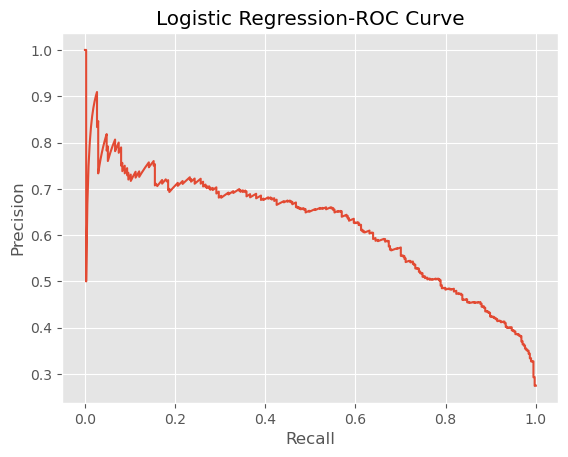

f1 Score : 0.5363276089828268 
 AUC Score (PR) : 0.6185957002131842


In [41]:
precision_recall_curve_and_scores(X_test,y_test,y_pred_knn,y_pred_logreg_proba,"Logistic Regression")

## Neural Network

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [43]:
# NN Model Parameter
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [44]:
class TrainData(Dataset):
    def __init__(self,X_data,y_data):
        self.X_data = X_data
        self.y_data = y_data
    
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return len(self.X_data)
    
class TestData(Dataset):
    def __init__(self,X_data):
        self.X_data = X_data
    
    def __getitem__(self,index):
        return self.X_data[index]
    
    def __len__(self):
        return len(self.X_data)

In [45]:
train_data = TrainData(torch.FloatTensor(X_train.to_numpy()),
                      torch.FloatTensor(y_train.to_numpy()))
test_data = TestData(torch.FloatTensor(X_test.to_numpy()))

In [46]:
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

In [54]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(X_train.shape[1],64)
        self.layer_2 = nn.Linear(40,64)
        self.layer_out = nn.Linear(64,1)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(inputs))
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [56]:
model = BinaryClassification()
model.to(device)

print(model)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=40, out_features=64, bias=True)
  (layer_2): Linear(in_features=40, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [57]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [58]:
for epoch in range(EPOCHS):
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        #Feed Forward
        y_pred = model(X_train)
        #Calculate Loss
        loss = loss_fn(y_pred,y_train.unsqueeze(1))
        acc = binary_acc(y_pred, y_train.unsqueeze(1))
        #Optimizer zero grad
        optimizer.zero_grad()
        #Loss Backward
        loss.backward()
        #Optimizer step
        optimizer.step()
    print(f"Epoch : {epoch} | loss : {loss:.3f} | acc : {acc}")
        

Epoch : 0 | loss : 0.455 | acc : 82.0
Epoch : 1 | loss : 0.425 | acc : 86.0
Epoch : 2 | loss : 0.453 | acc : 82.0
Epoch : 3 | loss : 0.352 | acc : 81.0
Epoch : 4 | loss : 0.471 | acc : 79.0
Epoch : 5 | loss : 0.351 | acc : 86.0
Epoch : 6 | loss : 0.407 | acc : 79.0
Epoch : 7 | loss : 0.332 | acc : 82.0
Epoch : 8 | loss : 0.542 | acc : 74.0
Epoch : 9 | loss : 0.391 | acc : 77.0
Epoch : 10 | loss : 0.444 | acc : 84.0
Epoch : 11 | loss : 0.424 | acc : 82.0
Epoch : 12 | loss : 0.298 | acc : 84.0
Epoch : 13 | loss : 0.436 | acc : 82.0
Epoch : 14 | loss : 0.356 | acc : 86.0
Epoch : 15 | loss : 0.482 | acc : 74.0
Epoch : 16 | loss : 0.474 | acc : 79.0
Epoch : 17 | loss : 0.419 | acc : 86.0
Epoch : 18 | loss : 0.422 | acc : 79.0
Epoch : 19 | loss : 0.339 | acc : 86.0
Epoch : 20 | loss : 0.486 | acc : 77.0
Epoch : 21 | loss : 0.405 | acc : 84.0
Epoch : 22 | loss : 0.312 | acc : 88.0
Epoch : 23 | loss : 0.453 | acc : 81.0
Epoch : 24 | loss : 0.293 | acc : 88.0
Epoch : 25 | loss : 0.444 | acc : 7

In [59]:
y_pred_list = []
model.eval()
with torch.inference_mode():
    for X_test in test_loader:
        X_test = X_test.to(device)
        y_test_pred = model(X_test)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_test_pred = torch.round(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze() for a in y_pred_list]

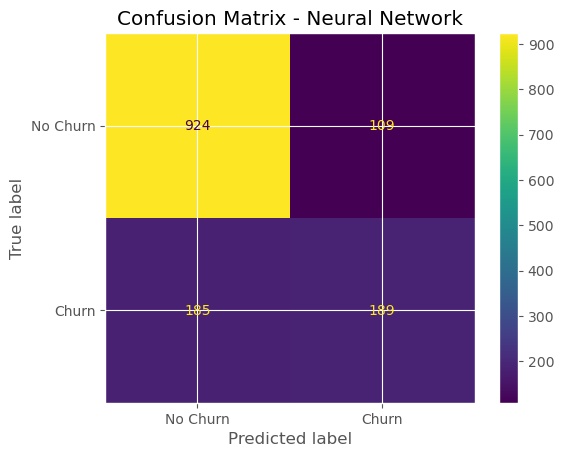

Accuracy Score : 0.7910447761194029


In [68]:
cm = confusion_matrix(y_test,y_pred_list)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No Churn", "Churn"])
display.plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_list)}")